In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Задание 5
Загрузите датасет из файла House.csv со следующими полями (жилищный рынок Нью-Йорка):
<ul>
<li>BROKERTITLE: Название брокера
<li>TYPE: Тип дома
<li>PRICE: Стоимость дома
<li>BEDS: Количество спален
<li>BATH: Количество ванных комнат
<li>PROPERTYSQFT: Площадь объекта
<li>ADDRESS: Полный адрес
<li>STATE: Состояние
<li>MAIN_ADDRESS: Информация об основном адресе
<li>ADMINISTRATIVE_AREA_LEVEL_2: Информация уровня второй административной области
<li>LOCALITY: Информация о месторасположении
<li>SUBLOCALITY: Информация о сублокальности
<li>STREET_NAME: Название улицы
<li>LONG_NAME: Длинное имя
<li>FORMATTED_ADDRESS: Форматированный адрес
<li>LATITUDE: Координата широты
<li>LONGITUDE: Координата долготы
</ul>
<ol>
<li>Удалите все записи, где есть пустые значения и выведите полученный датасет на экран
<li>Постройте матрицу корреляции для количественных данных и тепловую карту
</ol>    

                                            BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BEDS       BATH  PROPERTYSQFT  \
0

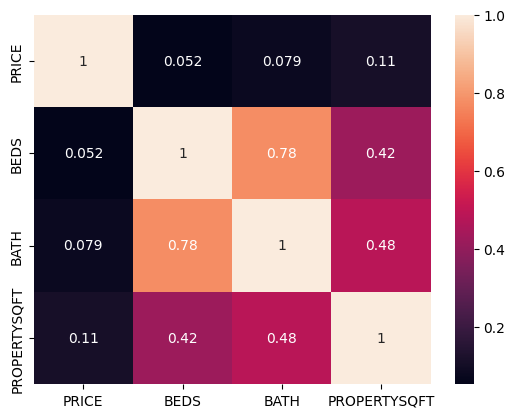

In [10]:
# 5.1
house = pd.read_csv(r'House.csv').dropna()
print(house)

# 5.2
matrix_corr = house[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].corr()
print(matrix_corr, sns.heatmap(matrix_corr, annot=True))

### Задание 6
<ol>
<li>Проанализируйте матрицу корреляции и тепловую карту и выберите три пары наиболее коррелирующих друг с другом параметров (ответ запишите в виде комментария в коде)
<li>Постройте для всех трех пар диаграммы рассеяния и проанализируйте, насколько диаграммы соответствуют коэффициентам корреляции (ответ запишите в виде комментария в коде).
</ol>

BEDS  BATH            0.776447
BATH  PROPERTYSQFT    0.483935
BEDS  PROPERTYSQFT    0.420503
dtype: float64


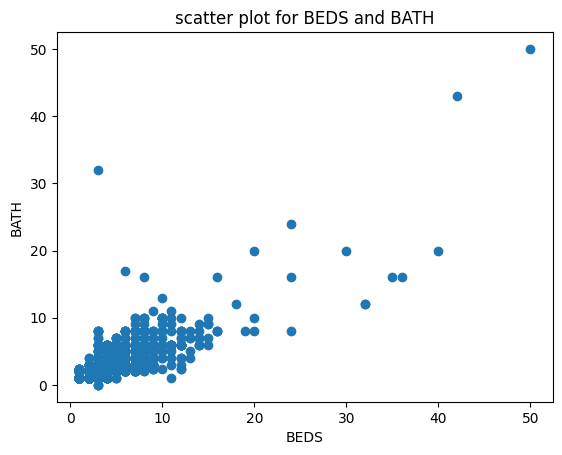

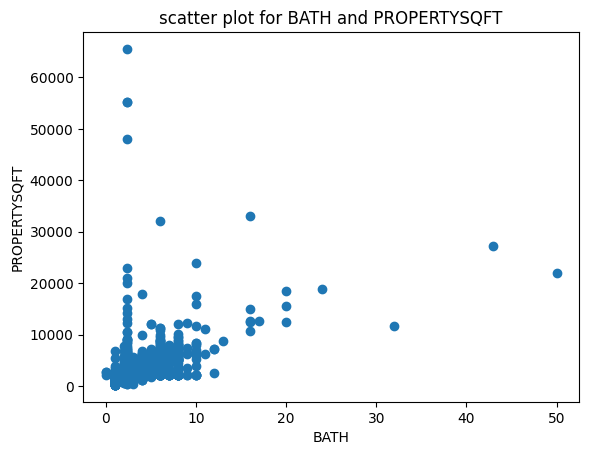

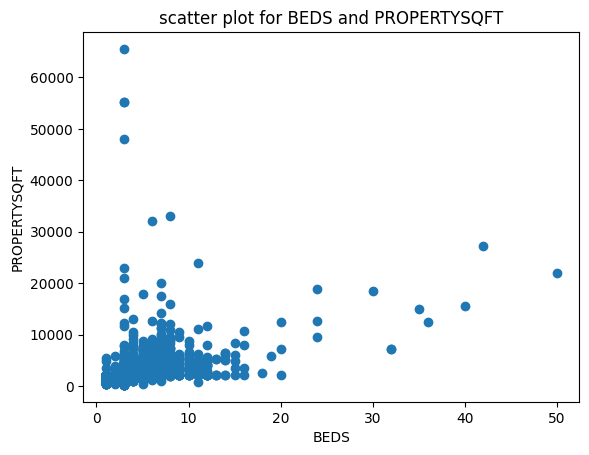

In [11]:
# 6.1
top_corr_pairs = matrix_corr[matrix_corr < 1].unstack().drop_duplicates().sort_values(ascending=False)[:3]
print(top_corr_pairs)

# 6.2
for a,b in top_corr_pairs.index:
    plt.figure()
    print(plt.scatter(x=house[a],y=house[b]))
    plt.title(f"scatter plot for {a} and {b}")
    plt.xlabel(a)
    plt.ylabel(b)
    
# * Чем ближе коэффициент корреляции к 1, тем точки более сконцентрированы вблизи прямой линии (что и происходит на наших графиках), 
# * чем ближе к 0, тем сильнее отдаляются от нее

### Задание 7
<ol>
    <li>Удалите выбросы в столбцах PRICE и PROPERTYSQF, используя межквартильный диапазон (про него можно почитать в теории к практике 1 и по <a href = "https://www.codecamp.ru/blog/remove-outliers-python/">ссылке</a>) 
    <li>Выведите информацию об оставшемся количестве строк        
    <li>Снова постройте матрицу корреляции и проведите анализ, как изменились коэффициенты корреляции, связанные с этими двумя полями (записать в виде комментария)        

In [12]:
def remove_outliers(df, columns):
    for column in columns:
        Q1, Q3 = np.percentile(df[column], [25, 75])
        IQR = Q3 - Q1
        df = df[(df[column] > Q1 - 1.5*IQR) & (df[column] < Q3 + 1.5*IQR)]
    return df

house = remove_outliers(house, ['PRICE', 'PROPERTYSQFT'])
print(f"Оставшееся количество строк: {len(house)}" +
      f"\nНовая корреляционная матрица:\n{house[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']].corr()}")

# * Как видим, корреляция стала ближе к 1, значит, точки рассеивания стали больше сконцентрированы около прямой

Оставшееся количество строк: 4111
Новая корреляционная матрица:
                 PRICE      BEDS      BATH  PROPERTYSQFT
PRICE         1.000000  0.398658  0.538508      0.375579
BEDS          0.398658  1.000000  0.720656      0.470607
BATH          0.538508  0.720656  1.000000      0.469447
PROPERTYSQFT  0.375579  0.470607  0.469447      1.000000
